<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/Outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from keras.utils.vis_utils import plot_model

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLdatasets/5.outlier.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [4]:
data.shape

(600, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


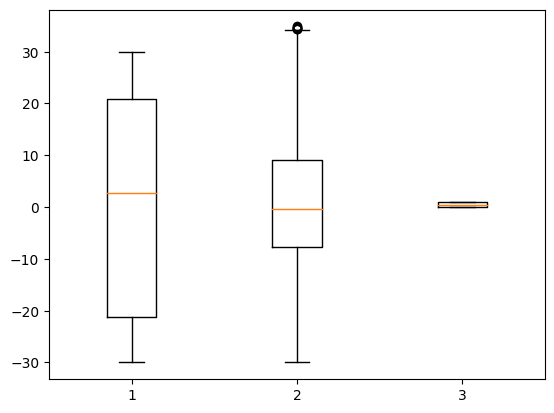

In [6]:
plt.boxplot(data)
plt.show()

Lot of outliers we need to handle them

In [7]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [8]:
find_outliers_IQR(data[1])

562    34.869783
563    34.607978
565    34.565364
566    34.338015
570    34.410244
571    34.758827
Name: 1, dtype: float64

In [9]:
def cap_Outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowbound = q1 -(1.5*IQR)
    upbound = q3 +(1.5*IQR)
    df = df.apply(lambda x : lowbound if x < lowbound  else  upbound  if x > upbound else x)
    return df

In [10]:
data[1] = cap_Outliers(data[1])

In [11]:
find_outliers_IQR(data[1])

Series([], Name: 1, dtype: float64)

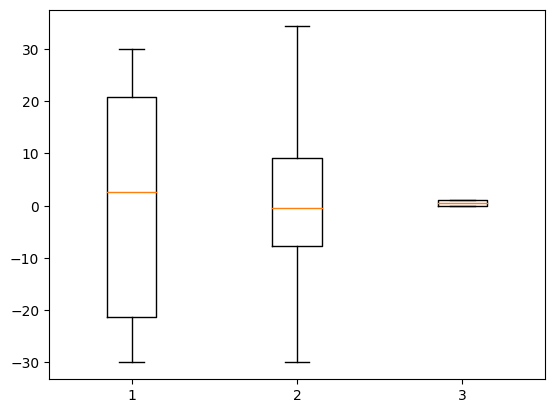

In [12]:
plt.boxplot(data)
plt.show()

Ouliers have been handled

In [13]:
data[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

balanced dataset

In [14]:
x = data[[0,1]]
y = data[2]

In [15]:
y = y.astype(int)

Output needs to be int for comparision with predicted output

> Indented block



In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [17]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((480, 2), (120, 2), 480, 120)

In [18]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

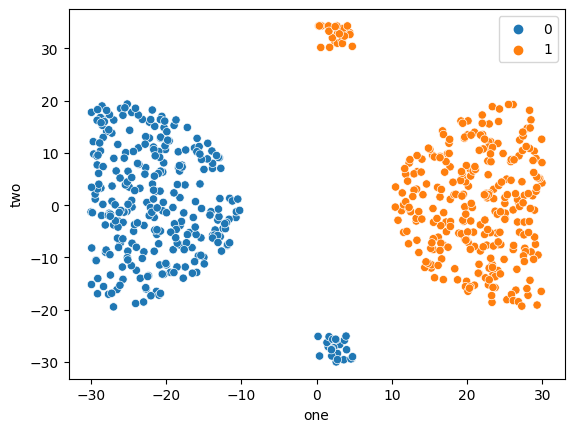

In [19]:
# code to visualize the data
data.columns = ["one","two","three"]
import seaborn as sns
sns.scatterplot(data=data, x="one",y="two",hue="three")
plt.legend()

In [20]:
model=Sequential()
model.add(Dense(5,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


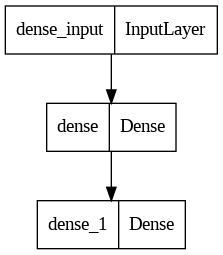

In [22]:
plot_model(model)

In [23]:
model.layers[0].get_weights()

[array([[ 0.8878951 ,  0.5090183 , -0.22350955,  0.8847071 ,  0.18329513],
        [ 0.623605  ,  0.40921593,  0.62750554,  0.39826584,  0.7434679 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [24]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
history = model.fit(x_train,y_train,batch_size=1,epochs=15,validation_split=0.2)

Epoch 1/15
384/384 [==============================] - 3s 6ms/step - loss: 0.6823 - accuracy: 0.5078 - val_loss: 0.6372 - val_accuracy: 0.5729
Epoch 2/15
384/384 [==============================] - 2s 5ms/step - loss: 0.5895 - accuracy: 0.7318 - val_loss: 0.5463 - val_accuracy: 0.9375
Epoch 3/15
384/384 [==============================] - 1s 4ms/step - loss: 0.5056 - accuracy: 0.9792 - val_loss: 0.4619 - val_accuracy: 1.0000
Epoch 4/15
384/384 [==============================] - 2s 5ms/step - loss: 0.4254 - accuracy: 0.9948 - val_loss: 0.3810 - val_accuracy: 1.0000
Epoch 5/15
384/384 [==============================] - 3s 8ms/step - loss: 0.3528 - accuracy: 1.0000 - val_loss: 0.3116 - val_accuracy: 1.0000
Epoch 6/15
384/384 [==============================] - 3s 9ms/step - loss: 0.2912 - accuracy: 1.0000 - val_loss: 0.2544 - val_accuracy: 1.0000
Epoch 7/15
384/384 [==============================] - 2s 5ms/step - loss: 0.2409 - accuracy: 1.0000 - val_loss: 0.2084 - val_accuracy: 1.0000
Epoch 

In [26]:
model.layers[0].get_weights()

[array([[ 0.11405621,  1.9636159 ,  1.7475498 ,  2.8976274 , -0.7030246 ],
        [ 0.5896518 ,  0.6241249 ,  0.69679326,  0.83298326,  0.5862834 ]],
       dtype=float32),
 array([ 0.15896855, -0.24865758, -0.28287265, -0.30356866,  0.18075149],
       dtype=float32)]

In [27]:
predict = np.where(model.predict(x_test)>0.5,1,0)

4/4 [==============================] - 0s 4ms/step


In [28]:
accuracy_score(y_test,predict)

1.0

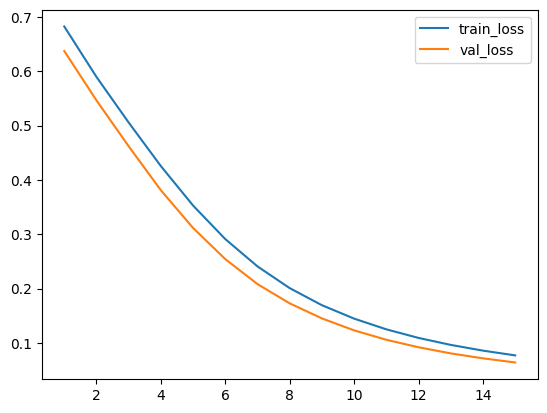

In [29]:
plt.plot(range(1,16),history.history["loss"],label="train_loss")
plt.plot(range(1,16),history.history["val_loss"],label="val_loss")
plt.legend()

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

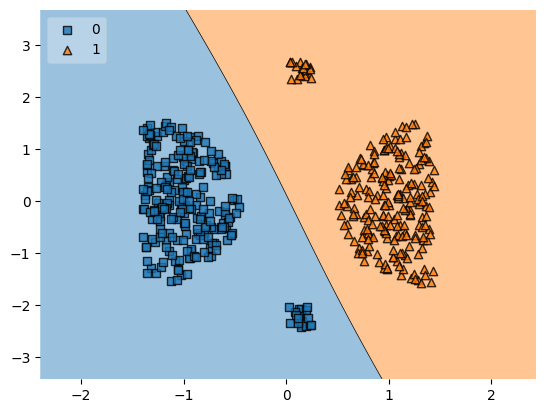

In [30]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

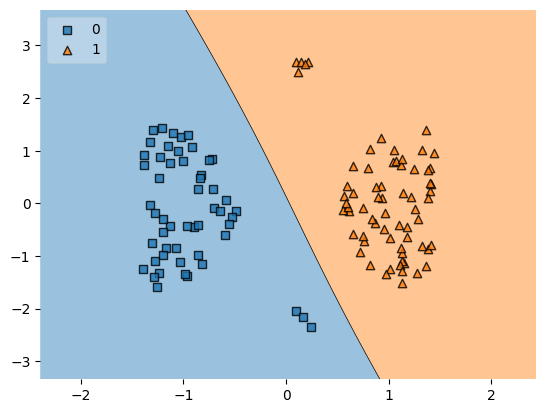

In [31]:
plot_decision_regions(x_test,y_test.values,clf=model,legend=2)